<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/Transaction_VS_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import files

In [15]:
!pip install yfinance

In [104]:
import datetime

In [18]:
import yfinance

In [2]:
files.upload()

Saving transactions_by_date.csv to transactions_by_date.csv


{'transactions_by_date.csv': b',transactions,trans_date\n0,1,2009-01-03\n1,14,2009-01-09\n2,61,2009-01-10\n3,93,2009-01-11\n4,101,2009-01-12\n5,123,2009-01-13\n6,130,2009-01-14\n7,134,2009-01-15\n8,110,2009-01-16\n9,109,2009-01-17\n10,108,2009-01-18\n11,117,2009-01-19\n12,115,2009-01-20\n13,103,2009-01-21\n14,92,2009-01-22\n15,86,2009-01-23\n16,202,2009-01-24\n17,192,2009-01-25\n18,97,2009-01-26\n19,98,2009-01-27\n20,112,2009-01-28\n21,122,2009-01-29\n22,117,2009-01-30\n23,139,2009-01-31\n24,114,2009-02-01\n25,129,2009-02-02\n26,155,2009-02-03\n27,119,2009-02-04\n28,126,2009-02-05\n29,122,2009-02-06\n30,133,2009-02-07\n31,133,2009-02-08\n32,135,2009-02-09\n33,120,2009-02-10\n34,135,2009-02-11\n35,119,2009-02-12\n36,124,2009-02-13\n37,136,2009-02-14\n38,131,2009-02-15\n39,123,2009-02-16\n40,117,2009-02-17\n41,118,2009-02-18\n42,125,2009-02-19\n43,122,2009-02-20\n44,114,2009-02-21\n45,125,2009-02-22\n46,108,2009-02-23\n47,106,2009-02-24\n48,105,2009-02-25\n49,107,2009-02-26\n50,116,2009-

In [139]:
transactions_btc = pd.read_csv( "transactions_by_date.csv")
transactions_btc.head()

,Unnamed: 0,transactions,trans_date
0,0,1,2009-01-03
1,1,14,2009-01-09
2,2,61,2009-01-10
3,3,93,2009-01-11
4,4,101,2009-01-12


In [140]:
print(transactions_btc.dtypes)

Unnamed: 0       int64
transactions     int64
trans_date      object
dtype: object


In [141]:
# convert the 'Date' column to datetime format
transactions_btc['trans_date']= pd.to_datetime(transactions_btc['trans_date'])

# Check the format of 'Date' column
transactions_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    4572 non-null   int64         
 1   transactions  4572 non-null   int64         
 2   trans_date    4572 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 107.3 KB


In [142]:
transactions_btc['Date'] = transactions_btc['trans_date']
transactions_btc.drop(columns=["trans_date", "Unnamed: 0"] , inplace=True)
transactions_btc.head()

,transactions,Date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


In [128]:
#transactions_btc['trans_date'] = transactions_btc['trans_date'].str.replace(r'-', '')
#transactions_btc.head()

,Unnamed: 0,transactions,trans_date
0,0,1,20090103
1,1,14,20090109
2,2,61,20090110
3,3,93,20090111
4,4,101,20090112


In [134]:
transactions_btc.index = transactions_btc.index.set_names(['Date'])
transactions_btc.head()

,Unnamed: 0,transactions,trans_date
Date,,,
0,0,1,2009-01-03
1,1,14,2009-01-09
2,2,61,2009-01-10
3,3,93,2009-01-11
4,4,101,2009-01-12


In [143]:
BTC = yfinance.download("BTC-USD")
BTC = BTC.reset_index()
BTC.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [146]:
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [152]:
BTC = BTC.merge(transactions_btc, how="inner", on="Date")

In [153]:
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transactions
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,80305
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,77364
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,69437
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,63482
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,59800


In [195]:
BTC["Transactions"] = BTC["transactions"]/10

In [187]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume,transactions,Transactions
Date,,,,,,,,
2021-07-11,33509.078125,34584.703125,33346.738281,34240.187500,34240.187500,20108729370,166144,6645.76
2021-07-12,34254.015625,34592.156250,32697.308594,33155.847656,33155.847656,24321499537,220269,8810.76
2021-07-13,33125.468750,33327.101562,32261.419922,32702.025391,32702.025391,19120856669,229916,9196.64
2021-07-14,32723.845703,33061.398438,31639.125000,32822.347656,32822.347656,21376531210,236217,9448.68
2021-07-15,32805.816406,33155.195312,31694.025391,31816.466797,31816.466797,20009494528,73908,2956.32


In [170]:
BTC.set_index("Date", inplace=True)

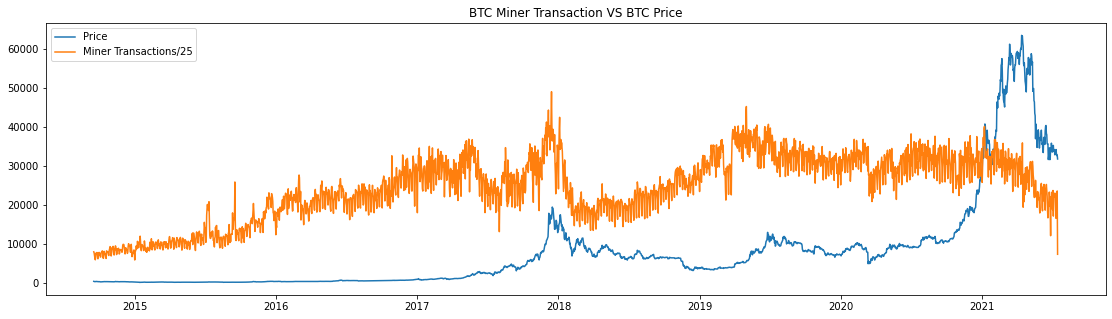

In [199]:
plt.figure(figsize=(19,5))
plt.plot("Adj Close", data=BTC, label="Price")
plt.plot("Transactions", data=BTC, label="Miner Transactions/25")
plt.title("BTC Miner Transaction VS BTC Price")
plt.legend()